In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Walmart.csv")
print(df.head())

   invoice_id   Branch         City                category unit_price  \
0           1  WALM003  San Antonio       Health and beauty     $74.69   
1           2  WALM048    Harlingen  Electronic accessories     $15.28   
2           3  WALM067  Haltom City      Home and lifestyle     $46.33   
3           4  WALM064      Bedford       Health and beauty     $58.22   
4           5  WALM013       Irving       Sports and travel     $86.31   

   quantity      date      time payment_method  rating  profit_margin  
0       7.0  05/01/19  13:08:00        Ewallet     9.1           0.48  
1       5.0  08/03/19  10:29:00           Cash     9.6           0.48  
2       7.0  03/03/19  13:23:00    Credit card     7.4           0.33  
3       8.0  27/01/19  20:33:00        Ewallet     8.4           0.33  
4       7.0  08/02/19  10:37:00        Ewallet     5.3           0.48  


In [10]:
df.describe()

,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [16]:
df.dtypes

invoice_id          int64
Branch             object
City               object
category           object
unit_price         object
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

In [31]:
df['unit_price'] = pd.to_numeric(df['unit_price'].replace('[\\$,]', '', regex=True), errors='coerce')
print(df)

       invoice_id   Branch         City                category  unit_price  \
0               1  WALM003  San Antonio       Health and beauty       74.69   
1               2  WALM048    Harlingen  Electronic accessories       15.28   
2               3  WALM067  Haltom City      Home and lifestyle       46.33   
3               4  WALM064      Bedford       Health and beauty       58.22   
4               5  WALM013       Irving       Sports and travel       86.31   
...           ...      ...          ...                     ...         ...   
10046        9996  WALM056      Rowlett     Fashion accessories       37.00   
10047        9997  WALM030   Richardson      Home and lifestyle       58.00   
10048        9998  WALM050     Victoria     Fashion accessories       52.00   
10049        9999  WALM032        Tyler      Home and lifestyle       79.00   
10050       10000  WALM069     Rockwall     Fashion accessories       62.00   

       quantity      date      time payment_method 

In [32]:
df['unit_price'].astype(float)

0        74.69
1        15.28
2        46.33
3        58.22
4        86.31
         ...  
10046    37.00
10047    58.00
10048    52.00
10049    79.00
10050    62.00
Name: unit_price, Length: 10020, dtype: float64

In [17]:
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [18]:
df.duplicated().sum()

51

In [20]:
df.dropna(inplace = True)
df.isnull().sum()

invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

In [31]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [42]:
df['total'] = df['unit_price'] * df['quantity']
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


In [33]:
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

In [54]:
df.columns.str.lower()

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total'],
      dtype='object')

In [43]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


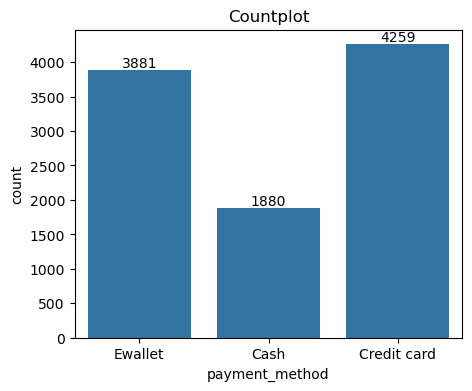

In [51]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x='payment_method')
ax.bar_label(ax.containers[0])
plt.title("Countplot")
plt.show()

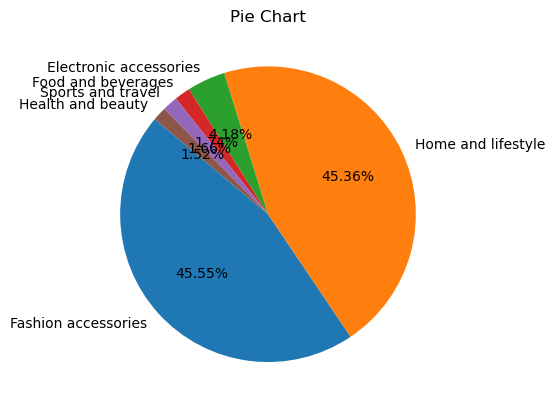

In [49]:
data_counts = df['category'].value_counts()
plt.pie(data_counts, labels=data_counts.index, autopct='%1.2f%%', startangle=140)
plt.title("Pie Chart")
plt.show()

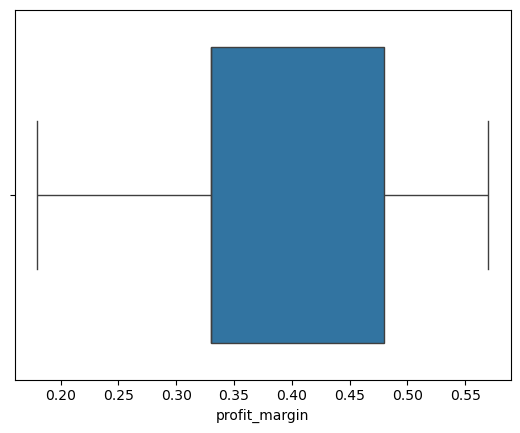

In [53]:
sns.boxplot(data=df, x = "profit_margin")
plt.show()

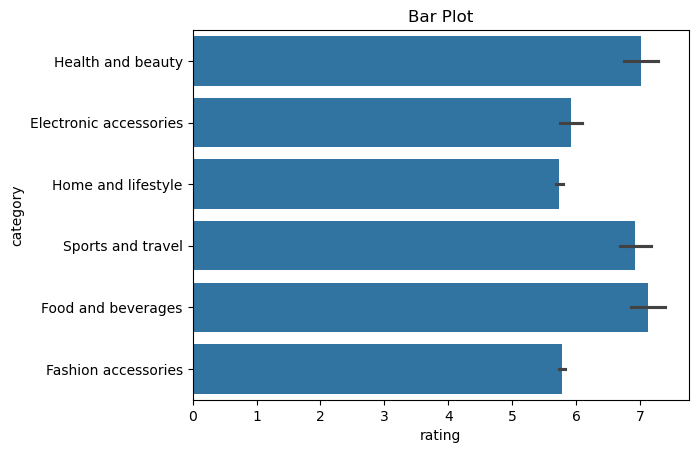

In [72]:
sns.barplot(data=df, x='rating', y='category')
plt.title("Bar Plot")
plt.xlabel("rating")
plt.ylabel("category")
plt.show()


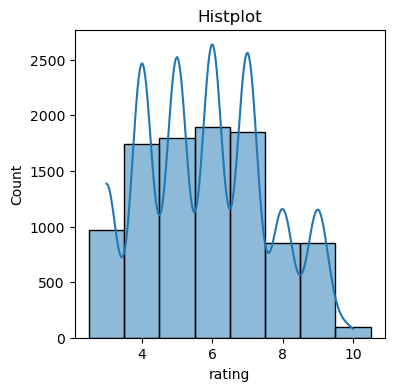

In [6]:
plt.figure(figsize =(4,4))
sns.histplot(data = df, x ='rating',kde = True,discrete = True,bins = 12)
plt.title("Histplot")
plt.show()